## Ex1 Use data from Danmarks Statistik - Databanken
1. Go to https://www.dst.dk/da/Statistik/brug-statistikken/muligheder-i-statistikbanken/api#testkonsol
2. Open 'Konsol' and click 'Start Konsol'
3. In the console at pt 1: choose 'Retrieve tables', pt 2: choose get request and json format and pt 3: execute:
  1. check the result
  2. in the code below this same get request is used to get information about all available data tables in 'databanken'. 
4. Change pt. 1 in the console to 'Retrieve data', pt 2: 'get request' and Table id: 'FOLK1A', format: csv, delimiter: semicolon and click: 'Variable and value codes' and choose some sub categories (Hint: hover over the codes to see their meaning). Finally execute and see what data you get.
5. With data aggregation and data visualization answer the following questions:
  1. What is the change in pct of divorced danes from 2008 to 2020?
  2. Which of the 5 biggest cities has the highest percentage of 'Never Married' in 2020?
  3. Show a bar chart of changes in marrital status in Copenhagen from 2008 till now
  4. Show 2 plots in same figure: 'Married' and 'Never Married' for all ages in DK in 2020 (Hint: x axis is age from 0-125, y axis is how many people in the 2 categories). Add lengend to show names on graphs
  
## Ex2 Use another table (extra)
Choose any of the other tables in 'databanken' to find interesting data.
1. Collect the data
2. Pose 5 or more interesing questions to the data
3. Answer the questions by aggregating the data
4. Illustrate the answers with visual plots

In [5]:
import pandas as pd 
url = 'https://api.statbank.dk/v1/tables'
dst = pd.read_json(url)
dst.to_csv('dk-stat-all-tables.csv', encoding='utf-8', index=False)
dst[:20]

,id,text,unit,updated,firstPeriod,latestPeriod,active,variables
0,FOLK1A,Folketal den 1. i kvartalet,antal,2021-02-11T08:00:00,2008K1,2021K1,True,"[område, køn, alder, civilstand, tid]"
1,FOLK1B,Folketal den 1. i kvartalet,antal,2021-02-11T08:00:00,2008K1,2021K1,True,"[område, køn, alder, statsborgerskab, tid]"
2,FOLK1C,Folketal den 1. i kvartalet,antal,2021-02-11T08:00:00,2008K1,2021K1,True,"[område, køn, alder, herkomst, oprindelsesland..."
3,FOLK1D,Folketal den 1. i kvartalet,antal,2021-02-11T08:00:00,2008K1,2021K1,True,"[område, køn, alder, statsborgerskab, tid]"
4,FOLK1E,Folketal den 1. i kvartalet,antal,2021-02-11T08:00:00,2008K1,2021K1,True,"[område, køn, alder, herkomst, tid]"
5,FOLK2,Folketal 1. januar,antal,2021-02-11T08:00:00,1980,2021,True,"[alder, køn, herkomst, statsborgerskab, oprind..."
6,KRYDS1,Folketal 1. januar,antal,2021-02-11T08:00:00,2019,2021,True,"[Hovedpersons herkomst, Hovedpersons fødeland,..."
7,KRYDS2,Personer med dansk oprindelse 1. januar,antal,2021-02-11T08:00:00,2019,2021,True,"[Hovedpersons fødeland, forældres fødeland og ..."
8,KRYDS3,Folketal 1. januar,antal,2021-02-11T08:00:00,2019,2021,True,"[Hovedpersons herkomst, Hovedpersons fødeland,..."
9,KRYDS4,Folketal 1. januar,antal,2021-02-11T08:00:00,2019,2021,True,"[Hovedpersons herkomst, forældres fødeland og ..."


In [26]:
import numpy as np
import pandas as pd

task5a_df = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&CIVILSTAND=F%2CTOT&Tid=2008K1%2C2020K1', delimiter=";")

#Thomas's løsning
divorced_filter = task5a_df['CIVILSTAND'] == 'Fraskilt'
divorced = task5a_df[divorced_filter]
alle = task5a_df[~divorced_filter] # ~ svarer til ! i Java, dvs. alt modsat af divorced_filter og dermed I alt
alle = alle.set_index(pd.Index([0,1]))
result = divorced['INDHOLD']/alle['INDHOLD']*100
print(f'Percentage in divorce has grown from {result[0]} to {result[1]} between 2008 and 2020')

# Assignment 5.A:
# divorced_2008 = task5a_df['INDHOLD'][0]
# divorced_2020 = task5a_df['INDHOLD'][1]
# print("Test: ", divorced_2008)
# divorce_change_pct = ((divorced_2020 - divorced_2008) / divorced_2008 * 100)
# print("Assignment 5A, What is the change in pct of divorced danes from 2008 to 2020?\nAnswer:", "%.2f" % divorce_change_pct, "%")

Percentage in divorce has grown from 7.832000892656421 to 9.352741988640101 between 2008 and 2020


In [61]:
import numpy as np
import pandas as pd

task5b_filedata = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=2020K4&OMR%C3%85DE=101%2C147%2C751%2C461%2C851&CIVILSTAND=U%2CTOT', delimiter=";")
task5b_df = pd.DataFrame(data=task5b_filedata)
task5b_df.drop(columns=['TID'])
#print(task5b_df)

total_population = task5b_df[task5b_df['CIVILSTAND'] == 'I alt']
total_unmarried = task5b_df[task5b_df['CIVILSTAND'] == 'Ugift']

pct_cph = (task5b_df['INDHOLD'][0]/task5b_df['INDHOLD'][1])*100
pct_frederiksberg = (task5b_df['INDHOLD'][2]/task5b_df['INDHOLD'][3])*100
pct_aarhus = (task5b_df['INDHOLD'][4]/task5b_df['INDHOLD'][5])*100
pct_odense = (task5b_df['INDHOLD'][6]/task5b_df['INDHOLD'][7])*100
pct_aalborg = (task5b_df['INDHOLD'][8]/task5b_df['INDHOLD'][9])*100

percentages = [pct_cph, pct_frederiksberg, pct_aarhus, pct_odense, pct_aalborg]

result = pd.DataFrame(data=percentages, index=task5b_df['OMRÅDE'].drop_duplicates(), columns=['Percent'])
print(result)

print("The city with highest percentage of people never married is as shown above: ", result.idxmax())

                 Percent
OMRÅDE                  
København      65.489642
Frederiksberg  58.475721
Aarhus         59.942282
Odense         55.196448
Aalborg        54.820118
The city with highest percentage of people never married is as shown above:  Percent    København
dtype: object


Values are showed with 5 million subtracted.


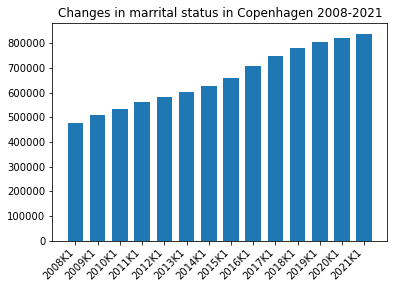

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
task5c_df = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&Tid=2008K1%2C2009K1%2C2010K1%2C2011K1%2C2012K1%2C2013K1%2C2014K1%2C2015K1%2C2016K1%2C2017K1%2C2018K1%2C2019K1%2C2020K1%2C2021K1', delimiter=";")

y_akse = task5c_df['INDHOLD'] - 5000000
plt.bar(task5c_df['TID'], y_akse, width=0.7, align='center')
plt.title("Changes in marrital status in Copenhagen 2008-2021")
plt.xticks(rotation=45, horizontalalignment='right',fontweight='light')
print("Values are showed with 5 million subtracted.")

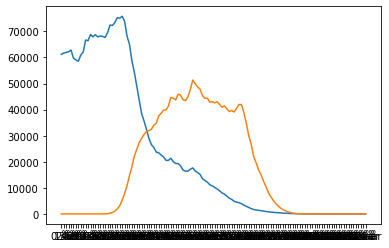

In [59]:
#import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

task5d_filedata = pd.read_csv('https://api.statbank.dk/v1/data/FOLK1A/CSV?delimiter=Semicolon&OMR%C3%85DE=000&ALDER=*&CIVILSTAND=G%2CU', delimiter=";")

married = task5d_filedata[task5d_filedata['CIVILSTAND'] == 'Gift/separeret']
unmarried = task5d_filedata[task5d_filedata['CIVILSTAND'] == 'Ugift']
plt.plot(list(unmarried['ALDER'][1:]), list(unmarried['INDHOLD'][1:]))
plt.plot(list(married['ALDER'][1:]), list(married['INDHOLD'][1:]))
# Ved ikke hvordan jeg kan fikse x-aksen